<a href="https://colab.research.google.com/github/medixbot-ai/CBC-Mask-RCNN/blob/main/Mask_RCNN_TF2_Custom_Training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Mask-RCNN Model on Custom Data

## 0. Install Required Libraries

In [1]:
!pip3 install scipy>=1.5.0
!pip3 install flatbuffers>=1.12
!pip3 install keras>=2.9.0
!pip3 install tensorboard>=2.9.1
!pip3 install tensorflow-estimator>=2.9.1


In [3]:
!apt-get update
!pip3 install scikit-image==0.16.2
!pip3 install opencv-python
!pip3 install tensorflow==2.2.0
!pip3 install keras==2.3.1

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Looking in indexes: https://pypi.org/simple, https:

### Verify the Version of the Installed Libraries

In [4]:
import tensorflow
import keras
import skimage

print(tensorflow.__version__)
print(keras.__version__)
print(skimage.__version__)

2.2.0
2.3.1
0.16.2


Using TensorFlow backend.


## 1. Prepare GitHub Project
The first step is to clone the project from GitHub: https://github.com/ahmedfgad/Mask-RCNN-TF2

In [5]:
!git clone 'https://github.com/ahmedfgad/Mask-RCNN-TF2.git'

Cloning into 'Mask-RCNN-TF2'...
remote: Enumerating objects: 1440, done.
remote: Total 1440 (delta 0), reused 0 (delta 0), pack-reused 1440
Receiving objects: 100% (1440/1440), 156.99 MiB | 29.03 MiB/s, done.
Resolving deltas: 100% (796/796), done.


In [6]:
#!git clone 'https://github.com/Shenggan/BCCD_Dataset.git' # load new data set and annotations  


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1) View the Contents of the Project.
There are 2 important directories in the project:
1. `mrcnn`: Contains the Python code for loading and training the model.
2. `BCCD_Dataset`: Contains the custom data.

In [8]:
!ls /content/Mask-RCNN-TF2

assets			      maskrcnn_predict_directed_RPN.py	samples
images			      maskrcnn_predict.py		setup.cfg
kangaroo-transfer-learning    mrcnn				setup.py
LICENSE			      mrcnn_directed			test.jpg
MANIFEST.in		      README.md
maskrcnn_predict_directed.py  requirements.txt


### 1.2) View the contents of the `BCCD_Dataset` Directory.
The `BCCD_Dataset` directory has a folder called `BCCD` with the dataset images and their annotations.

In [9]:
!ls /content/drive/MyDrive/BCCD_Dataset

BCCD	 example.jpg  LICENSE  README.md  test.csv
dataset  export.py    plot.py  scripts


### 1.3) Go Inside the `BCCD` Directory.
The `kangaroo` directory has 2 folders:
1. `JPEGimages`: The dataset images.
2. `Annotations`: The annotations of the images in `xml` format.

In [10]:
%cd /content/drive/MyDrive/BCCD_Dataset/BCCD
!ls

/content/drive/MyDrive/BCCD_Dataset/BCCD
Annotations  ImageSets	JPEGImages  Mask-RCNN-TF2


### 1.4) List the Images in the `JPEGImages` Directory.
The dataset has **364** images.

In [11]:
"""
Rename all files in a folder to numbers
"""

"""
import os

images_dir = '/content/Mask-RCNN-TF2/BCCD_Dataset/BCCD/BCCD_Dataset/BCCD/JPEGImages'
annot_dir = '/content/Mask-RCNN-TF2/BCCD_Dataset/BCCD/BCCD_Dataset/BCCD/Annotations'

path = images_dir
files = os.listdir(path)
for index, file in enumerate(files):
  os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index+1), '.jpg'])))
   
path = annot_dir
files = os.listdir(path)

for index, file in enumerate(files):
  os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index+1), '.xml'])))

"""

"\nimport os\n\nimages_dir = '/content/Mask-RCNN-TF2/BCCD_Dataset/BCCD/BCCD_Dataset/BCCD/JPEGImages'\nannot_dir = '/content/Mask-RCNN-TF2/BCCD_Dataset/BCCD/BCCD_Dataset/BCCD/Annotations'\n\npath = images_dir\nfiles = os.listdir(path)\nfor index, file in enumerate(files):\n  os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index+1), '.jpg'])))\n   \npath = annot_dir\nfiles = os.listdir(path)\n\nfor index, file in enumerate(files):\n  os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index+1), '.xml'])))\n\n"

In [12]:
!ls ./JPEGImages
!ls ./JPEGImages -l . | egrep -c '^-' # Count the number of files in the directory. 

100.jpg  138.jpg  175.jpg  211.jpg  249.jpg  286.jpg  322.jpg  35.jpg	68.jpg
101.jpg  139.jpg  176.jpg  212.jpg  24.jpg   287.jpg  323.jpg  360.jpg	69.jpg
102.jpg  13.jpg   177.jpg  213.jpg  250.jpg  288.jpg  324.jpg  361.jpg	6.jpg
103.jpg  140.jpg  178.jpg  214.jpg  251.jpg  289.jpg  325.jpg  362.jpg	70.jpg
104.jpg  141.jpg  179.jpg  215.jpg  252.jpg  28.jpg   326.jpg  363.jpg	71.jpg
105.jpg  142.jpg  17.jpg   216.jpg  253.jpg  290.jpg  327.jpg  364.jpg	72.jpg
106.jpg  143.jpg  180.jpg  217.jpg  254.jpg  291.jpg  328.jpg  36.jpg	73.jpg
107.jpg  144.jpg  181.jpg  218.jpg  255.jpg  292.jpg  329.jpg  37.jpg	74.jpg
108.jpg  145.jpg  182.jpg  219.jpg  256.jpg  293.jpg  32.jpg   38.jpg	75.jpg
109.jpg  146.jpg  183.jpg  21.jpg   257.jpg  294.jpg  330.jpg  39.jpg	76.jpg
10.jpg	 147.jpg  184.jpg  220.jpg  258.jpg  295.jpg  331.jpg  3.jpg	77.jpg
110.jpg  148.jpg  185.jpg  221.jpg  259.jpg  296.jpg  332.jpg  40.jpg	78.jpg
111.jpg  149.jpg  186.jpg  222.jpg  25.jpg   297.jpg  333.jpg  41.jpg	79.j

### 1.5) Read and Show an Image

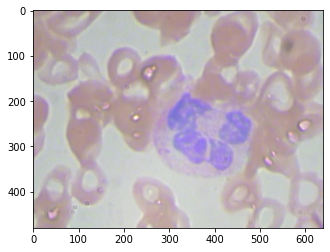

In [13]:
import skimage.io
import matplotlib.pyplot

im_name = "1"
img = skimage.io.imread("./JPEGImages/" + im_name + ".jpg")

matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()

### 1.6) List the Files in the `Annotations` Directory.
The `annots` directory has **364** `xml` files, one for each image.

In [14]:
!ls ./Annotations   
!ls ./Annotations -l . | egrep -c '^-' # Count the number of files in the directory. 

100.xml  138.xml  175.xml  211.xml  249.xml  286.xml  322.xml  35.xml	68.xml
101.xml  139.xml  176.xml  212.xml  24.xml   287.xml  323.xml  360.xml	69.xml
102.xml  13.xml   177.xml  213.xml  250.xml  288.xml  324.xml  361.xml	6.xml
103.xml  140.xml  178.xml  214.xml  251.xml  289.xml  325.xml  362.xml	70.xml
104.xml  141.xml  179.xml  215.xml  252.xml  28.xml   326.xml  363.xml	71.xml
105.xml  142.xml  17.xml   216.xml  253.xml  290.xml  327.xml  364.xml	72.xml
106.xml  143.xml  180.xml  217.xml  254.xml  291.xml  328.xml  36.xml	73.xml
107.xml  144.xml  181.xml  218.xml  255.xml  292.xml  329.xml  37.xml	74.xml
108.xml  145.xml  182.xml  219.xml  256.xml  293.xml  32.xml   38.xml	75.xml
109.xml  146.xml  183.xml  21.xml   257.xml  294.xml  330.xml  39.xml	76.xml
10.xml	 147.xml  184.xml  220.xml  258.xml  295.xml  331.xml  3.xml	77.xml
110.xml  148.xml  185.xml  221.xml  259.xml  296.xml  332.xml  40.xml	78.xml
111.xml  149.xml  186.xml  222.xml  25.xml   297.xml  333.xml  41.xml	79.x

### 1.7) Read an `xml` File
The `xml` file has information about the image like:
1. Name
2. Width
3. Height

It also has information about each object inside the `bndbox` element. There is a `bndbox` element for each object in the image.

The `bndbox` element has the coordinates of the bounding box surrounding each object:
1. `xmin`
2. `ymin`
3. `xmax`
4. `ymax`

In [15]:
import xml

im_name = "2"
with open("./Annotations/" + im_name + ".xml") as f:
    print(f.read())

<annotation>
	<folder>JPEGImages</folder>
	<filename>BloodImage_00001.jpg</filename>
	<path>/home/pi/detection_dataset/JPEGImages/BloodImage_00001.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>640</width>
		<height>480</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>WBC</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>68</xmin>
			<ymin>315</ymin>
			<xmax>286</xmax>
			<ymax>480</ymax>
		</bndbox>
	</object>
	<object>
		<name>RBC</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>346</xmin>
			<ymin>361</ymin>
			<xmax>446</xmax>
			<ymax>454</ymax>
		</bndbox>
	</object>
	<object>
		<name>RBC</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>53</xmin>
			<ymin>179</ymin>
			<xmax>146</xmax>
			<ymax>299</ymax>
		</bndbox>
	</object>
	<object>
		<n

### 1.8) Parse an `xml` File
The following code parses an `xml` file using the `xml` module. Based on the bounding box coordinates in the `bndbox` elements, a bounding box is drawn around each object.

There are 20 objects in the image.
BBoxes: [[42, 183, 277, 381, 'WBC'], [398, 222, 519, 330, 'RBC'], [505, 103, 626, 211, 'RBC'], [366, 315, 472, 413, 'RBC'], [456, 312, 562, 410, 'RBC'], [524, 250, 630, 348, 'RBC'], [534, 335, 640, 433, 'RBC'], [353, 43, 459, 141, 'RBC'], [316, 43, 422, 141, 'RBC'], [265, 25, 371, 123, 'RBC'], [221, 18, 327, 116, 'RBC'], [109, 1, 221, 85, 'RBC'], [1, 166, 96, 299, 'RBC'], [263, 402, 365, 480, 'RBC'], [178, 402, 280, 480, 'RBC'], [1, 1, 102, 77, 'RBC'], [196, 135, 313, 215, 'RBC'], [447, 392, 607, 480, 'RBC'], [148, 62, 234, 172, 'RBC'], [438, 1, 564, 85, 'RBC']]



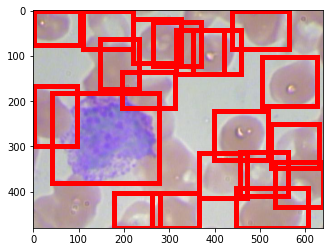

In [16]:
import skimage.io
import matplotlib.pyplot, matplotlib.patches

def extract_boxes(filename):
    tree = xml.etree.ElementTree.parse(filename)
    
    root = tree.getroot()

    boxes = list()
    for box in root.findall('.//object'):
            name = box.find('name').text   #Add label name to the box list
            xmin = int(box.find('./bndbox/xmin').text)
            ymin = int(box.find('./bndbox/ymin').text)
            xmax = int(box.find('./bndbox/xmax').text)
            ymax = int(box.find('./bndbox/ymax').text)
            coors = [xmin, ymin, xmax, ymax, name]
            boxes.append(coors)
# extract image dimensions
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height

im_name = "9"
img = skimage.io.imread("./JPEGImages/" + im_name + ".jpg")

boxes, w, h = extract_boxes("/content/drive/MyDrive/BCCD_Dataset/BCCD/Annotations/" + im_name + ".xml")
print("There are {count} objects in the image.".format(count=len(boxes)))
print("BBoxes:", boxes, end="\n\n")

fig, ax = matplotlib.pyplot.subplots()
ax.imshow(img)

for box_idx in range(len(boxes)):
    rect = matplotlib.patches.Rectangle((boxes[box_idx][0], boxes[box_idx][1]), 
                                        boxes[box_idx][2]-boxes[box_idx][0], boxes[box_idx][3]-boxes[box_idx][1], 
                                        linewidth=5, 
                                        edgecolor='r', 
                                        facecolor='none')
    ax.add_patch(rect)

matplotlib.pyplot.show()

### 1.9) Change the Directory to the Root of the GitHub Project

In [17]:
%cd /content/Mask-RCNN-TF2

/content/Mask-RCNN-TF2


## 2. Training Steps
1. Prepare the train and validation datasets by extending the `mrcnn.utils.Dataset` class.
2. Prepare the model configuration parameters by extending the `mrcnn.config.Config` class.
3. Build the Mask R-CNN model architecture by instantiating the `mrcnn.model.MaskRCNN` class.
4. Download and load the pretrained weights.
5. Train the model.
6. Save the trained weights.

### 2.1) Extend `mrcnn.utils.Dataset` Class
The extended class implements 2 methods: 
1. `load_dataset()`: Groups information (image ID, image path, and annotation file path) about all images in a single dictionary.
2. `load_mask()`: Groups the binary masks for all images in a single list.

In [18]:
"""dataset_dir='/content/drive/MyDrive/BCCD_Dataset/BCCD'
images_dir = dataset_dir + '/JPEGImages/'
annotations_dir = dataset_dir + '/Annotations/'
a=0
for filename in os.listdir(images_dir):
  image_id = filename[:-4]
  a+=1
  print(filename)

print(a)  """

"dataset_dir='/content/drive/MyDrive/BCCD_Dataset/BCCD'\nimages_dir = dataset_dir + '/JPEGImages/'\nannotations_dir = dataset_dir + '/Annotations/'\na=0\nfor filename in os.listdir(images_dir):\n  image_id = filename[:-4]\n  a+=1\n  print(filename)\n\nprint(a)  "

In [19]:
import os
import xml.etree
from numpy import zeros, asarray

import mrcnn
import mrcnn.utils
import mrcnn.config
import mrcnn.model

class CbcDataset(mrcnn.utils.Dataset):

    def load_dataset(self, dataset_dir, is_train=True):
        self.add_class("dataset", 1, "WBC")
        self.add_class("dataset", 2, "RBC")
        self.add_class("dataset", 3, "Platelets")

        images_dir = dataset_dir + '/JPEGImages/'
        annotations_dir = dataset_dir + '/Annotations/'

        for filename in os.listdir(images_dir):
            image_id = filename[:-4]
            
            #image_name=image_id[12:16]

            if is_train and int(image_id) >= 300:
                continue

            if not is_train and int(image_id) < 300:
                continue

            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'

            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
    
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        path = info['annotation']
        boxes, w, h = extract_boxes("/content/drive/MyDrive/BCCD_Dataset/BCCD/Annotations/" + im_name + ".xml")
        masks = zeros([h, w, len(boxes)], dtype='uint8')

        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]

            if (box[4] == 'WBC'):
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index('WBC'))
            elif(box[4] == 'RBC'):
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index('RBC')) 
            elif(box[4] == 'Platelets'):
                masks[row_s:row_e, col_s:col_e, i] = 3
                class_ids.append(self.class_names.index('Platelets'))
            else:
              continue

        return masks, asarray(class_ids, dtype='int32')

    # A helper method to extract the bounding boxes from the annotation file
    def extract_boxes(self, filename):
        tree = xml.etree.ElementTree.parse(filename)

        root = tree.getroot()

        boxes = list()
        for box in root.findall('.//bndbox'):
            name=box.find('name')
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)

        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

/content/Mask-RCNN-TF2/mrcnn/model.py:2370: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


#### Instantiate the New Class `BCCD`

In [20]:
# Train
train_set = CbcDataset()
train_set.load_dataset(dataset_dir='/content/drive/MyDrive/BCCD_Dataset/BCCD', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test_set
test_set = CbcDataset()
test_set.load_dataset(dataset_dir='/content/drive/MyDrive/BCCD_Dataset/BCCD', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 299
Test: 65


### 2.2) Extend the `mrcnn.config.Config` Class
Prepare the model configuration parameters like:
1. The number of classes in the dataset.
2. The number of steps per epoch.
3. The learning rate.

In [21]:
class CbcConfig(mrcnn.config.Config):
    NAME = "cbc_cfg"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 1+3
    
    LEARNING_RATE = 0.001

    STEPS_PER_EPOCH = 100

#### Instantiate the New Class `KangarooConfig`

In [22]:
CbcConfig = CbcConfig()

### 2.3) Build the Mask R-CNN Model Architecture
Instantiate the `mrcnn.model.MaskRCNN` class.

Remember to set `mode=training`

In [23]:
model = mrcnn.model.MaskRCNN(mode='training', 
                             model_dir='./log', 
                             config=CbcConfig)
model.keras_model.summary()

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

### 2.4) Download The Pretrained Weights

In [24]:
"""import urllib.request

urllib.request.urlretrieve("https://github.com/matterport/Mask_RCNN/releases/download/v1.0/mask_rcnn_coco.h5", "mask_rcnn_coco.h5")"""

'import urllib.request\n\nurllib.request.urlretrieve("https://github.com/matterport/Mask_RCNN/releases/download/v1.0/mask_rcnn_coco.h5", "mask_rcnn_coco.h5")'

#### Load the Weights and Exclude the Top Layers

In [25]:
model.load_weights(filepath='/content/drive/MyDrive/CBC_Mask_RCNN/mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
print("Weights loaded!")

Weights loaded!


### 2.5) Train the Model
Only the model head is trained.

In [ ]:
# train weights (output layers or 'heads')
model.train(train_set, test_set, learning_rate=CbcConfig.LEARNING_RATE, epochs=100, layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: //logdir//train/mask_rcnn_cbc_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/keras/engine/training_generator.py:48: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  warnings.warn(


Epoch 1/100
100/100 [==============================] - 6116s 61s/step - loss: 2.9366 - val_loss: 1.7960
Epoch 2/100
 26/100 [======>.......................] - ETA: 1:02:38 - loss: 1.8004

### 2.6) Save the Trained Weights

In [ ]:
model_path = '/content/drive/MyDrive/CBC_Mask_RCNN/CBC_mask_rcnn_trained.h5'
model.keras_model.save_weights(model_path)

## 3. Complete Code for Training

In [ ]:
import mrcnn
import mrcnn.utils
import mrcnn.config
import mrcnn.model

import urllib.request

import os
import xml.etree
from numpy import zeros, asarray

class KangarooDataset(mrcnn.utils.Dataset):

    def load_dataset(self, dataset_dir, is_train=True):
        self.add_class("dataset", 1, "kangaroo")

        images_dir = dataset_dir + '/images/'
        annotations_dir = dataset_dir + '/annots/'

        for filename in os.listdir(images_dir):
            image_id = filename[:-4]

            if is_train and int(image_id) >= 150:
                continue

            if not is_train and int(image_id) < 150:
                continue

            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'

            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        path = info['annotation']
        boxes, w, h = self.extract_boxes(path)
        masks = zeros([h, w, len(boxes)], dtype='uint8')

        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('kangaroo'))
        return masks, asarray(class_ids, dtype='int32')

    # A helper method to extract the bounding boxes from the annotation file
    def extract_boxes(self, filename):
        tree = xml.etree.ElementTree.parse(filename)

        root = tree.getroot()

        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)

        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

class KangarooConfig(mrcnn.config.Config):
    NAME = "kangaroo_cfg"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 2
    
    LEARNING_RATE = 0.001

    STEPS_PER_EPOCH = 131

kangaroo_config = KangarooConfig()

# Train
train_dataset = KangarooDataset()
train_dataset.load_dataset(dataset_dir='./kangaroo-transfer-learning/kangaroo', is_train=True)
train_dataset.prepare()

# Validation
validation_dataset = KangarooDataset()
validation_dataset.load_dataset(dataset_dir='./kangaroo-transfer-learning/kangaroo', is_train=False)
validation_dataset.prepare()

model = mrcnn.model.MaskRCNN(mode='training', 
                             model_dir='./log', 
                             config=kangaroo_config)
model.keras_model.summary()

urllib.request.urlretrieve("https://github.com/matterport/Mask_RCNN/releases/download/v1.0/mask_rcnn_coco.h5", "mask_rcnn_coco.h5")

model.load_weights(filepath='mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
print("Weights loaded!")

model.train(train_dataset=train_dataset, 
            val_dataset=validation_dataset, 
            learning_rate=kangaroo_config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')

model_path = 'Kangaro_mask_rcnn_trained.h5'
model.keras_model.save_weights(model_path)

## 4. Make Predictions

In [ ]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

CLASS_NAMES = ['BG','WBC', 'RBC', 'Platelet']

class PredictionConfig(mrcnn.config.Config):
    NAME = "cbc_cfg"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=PredictionConfig(),
                             model_dir=os.getcwd())

model.load_weights(filepath="/content/drive/MyDrive/CBC_Mask_RCNN/CBC_mask_rcnn_trained.h5", 
                   by_name=True)

image = cv2.imread("/content/drive/MyDrive/BCCD_Dataset/BCCD/JPEGImages/361.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])